In [2]:
import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six.moves import urllib
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [3]:
df = pd.read_csv('housing.csv')
housing=pd.read_csv('housing.csv')

In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

statistsics description of the data

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


visualization of the statistics using histograms

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

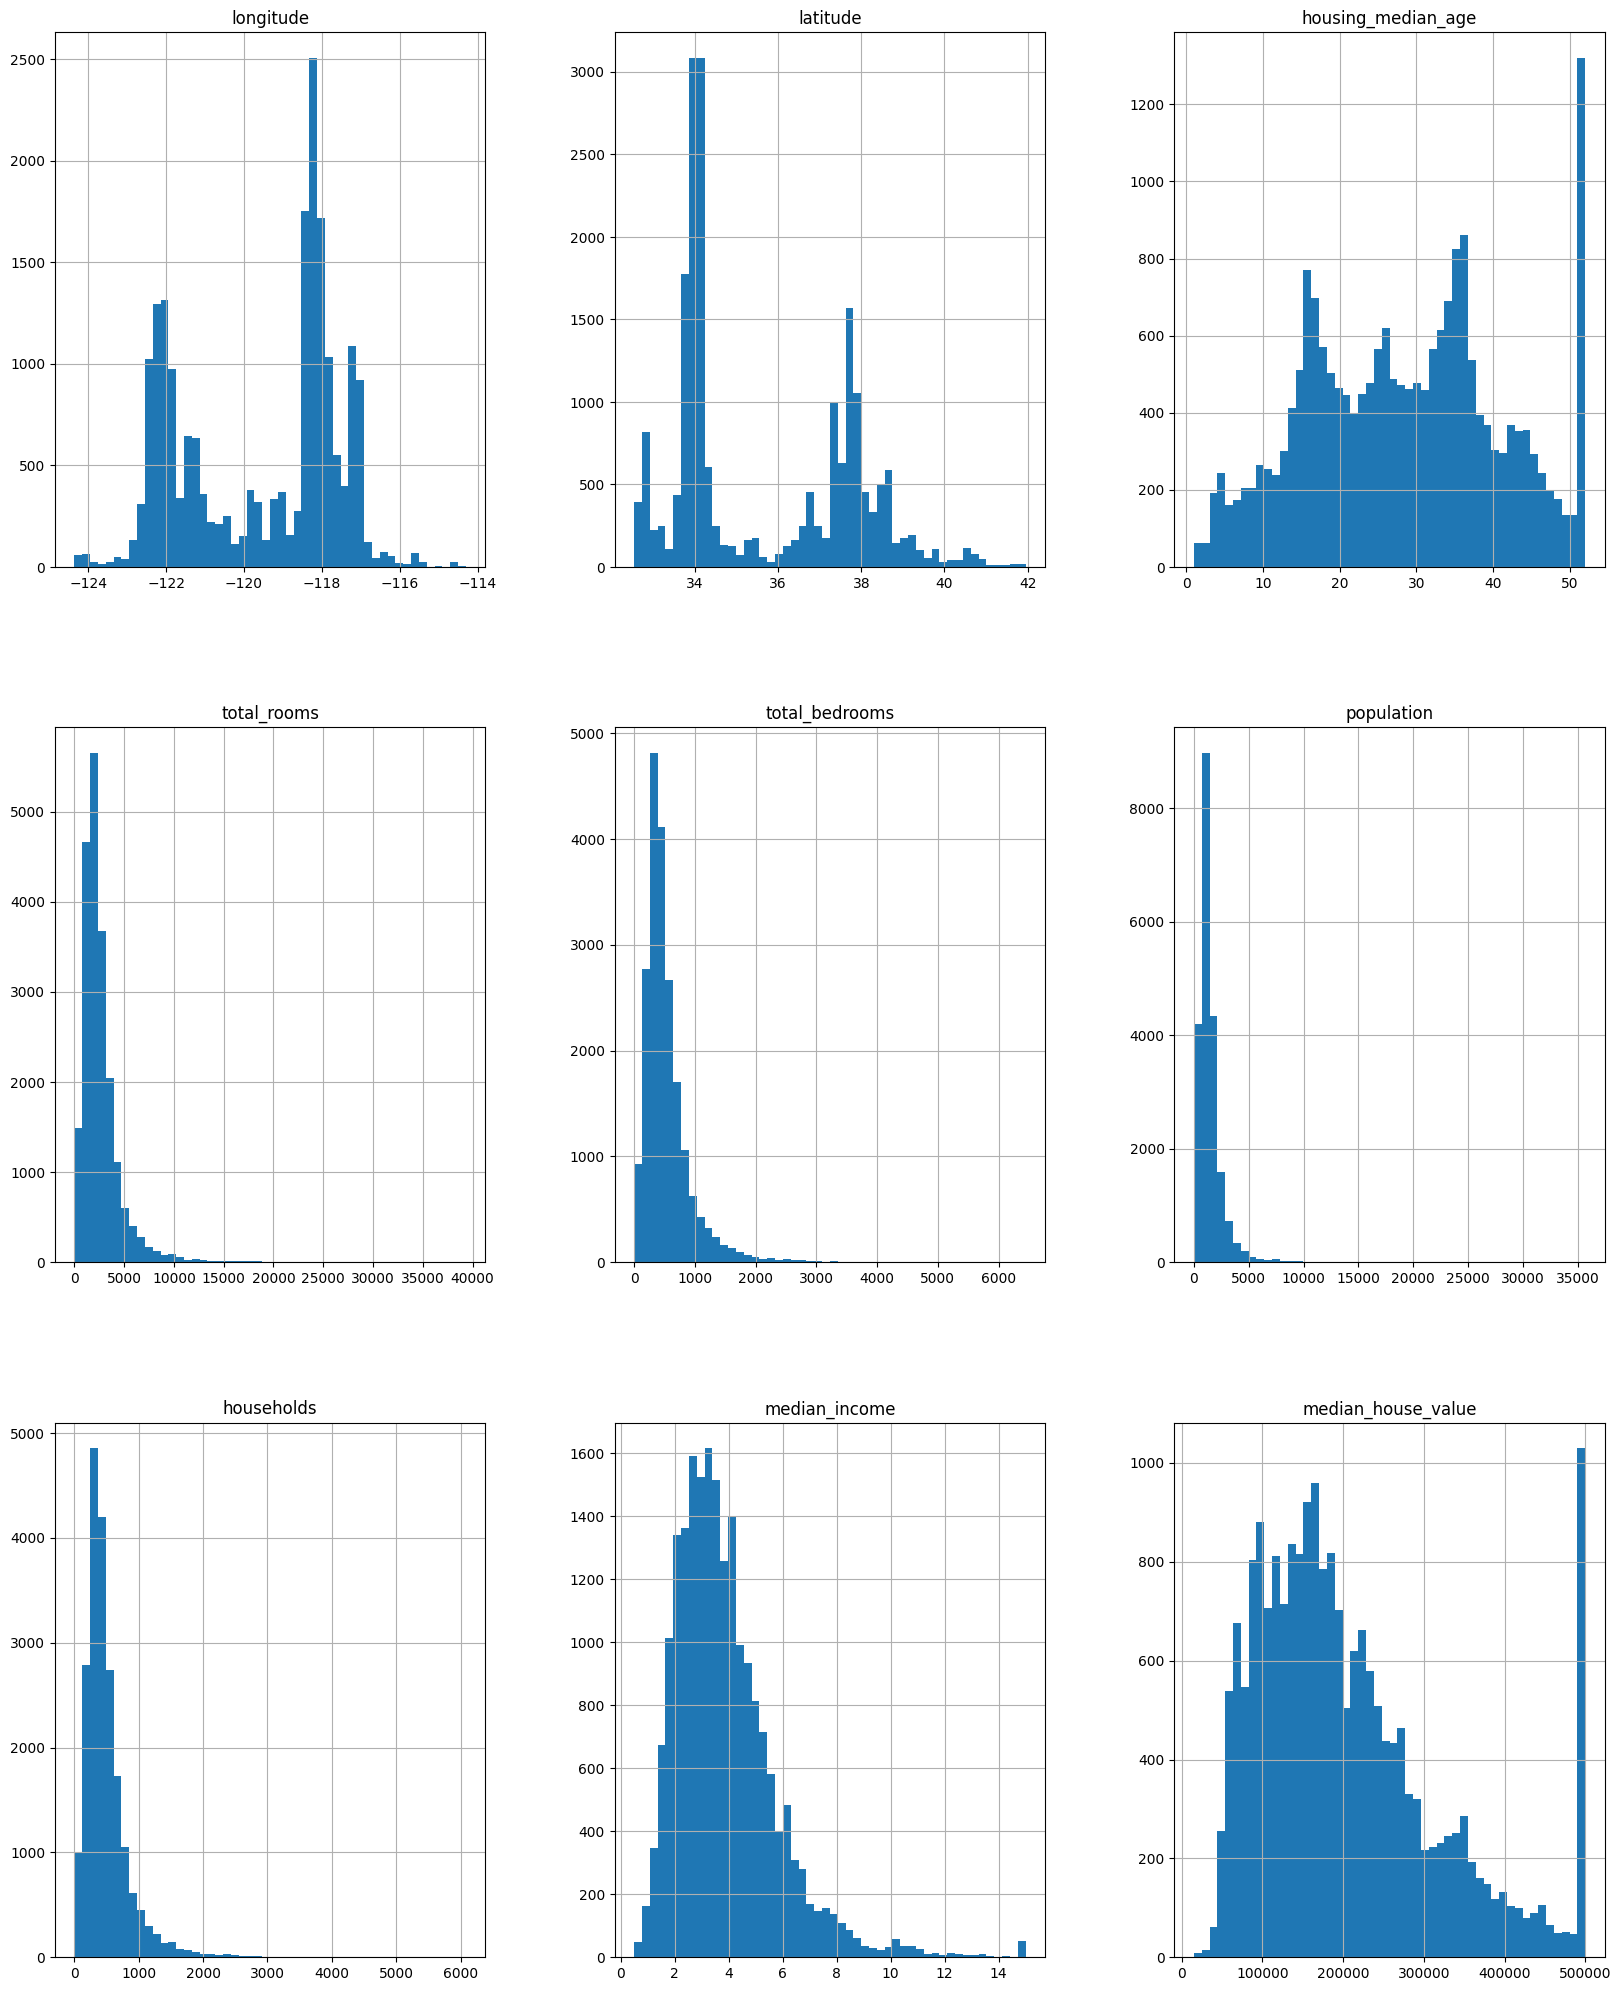

In [6]:
housing.hist(bins=50,figsize=(20,25))

#the price of the house of anything above $500,000 was all put togethere (that visualization with other graphs will couse overlay or some errors )
#also the same for age 

<Axes: xlabel='longitude', ylabel='latitude'>

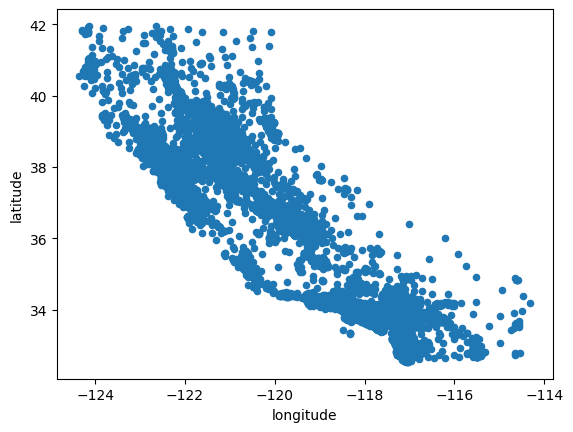

In [7]:
housing.plot(kind='scatter', x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

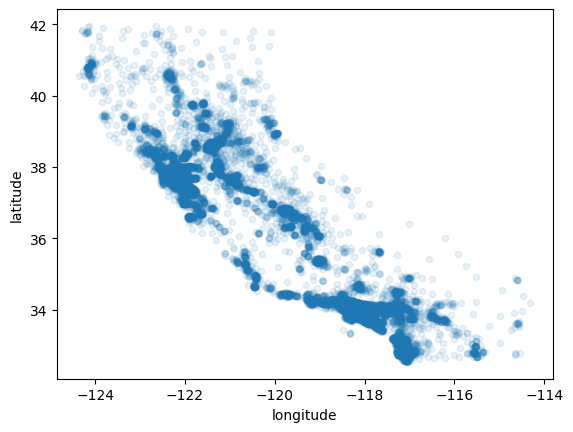

In [8]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

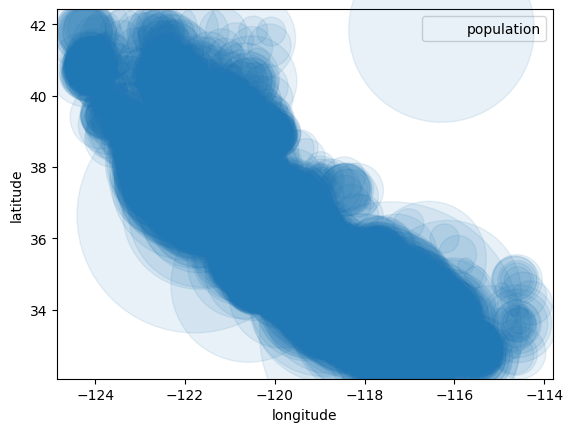

In [9]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1,
             s=housing["population"], label="population")

<Axes: xlabel='longitude', ylabel='latitude'>

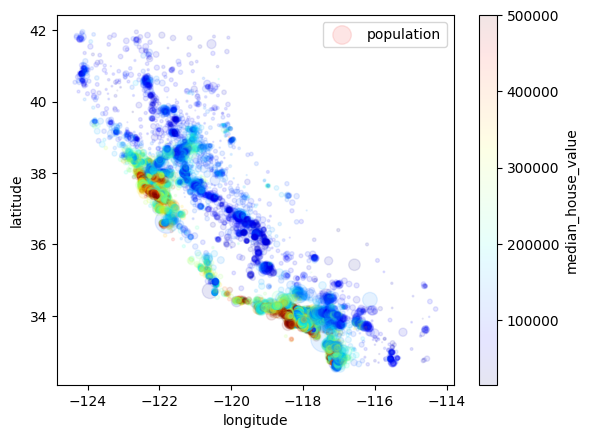

In [10]:
housing.plot(kind='scatter', x="longitude", y="latitude", alpha=0.1,
             s=housing["population"]/100, label="population",
# you can try to fix the dots to something small by diving population by 100
#i tried 10 and 1000 but not give me a good visualazition solution
c="median_house_value", cmap=plt.get_cmap("jet"))

In [11]:
numeric_housing = housing.select_dtypes(include=[np.number])
correlation_matrix = numeric_housing.corr()
print(correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [12]:
corr_matrix = numeric_housing.corr()
sorted_corr = corr_matrix["median_house_value"].sort_values(ascending=False)
print(sorted_corr)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [13]:
housing_na=housing.dropna(subset="total_bedrooms")
housing_na.shape


(20433, 10)

#here we drop all the missing values of the number of bedrommsin our dataset
#we are creating a new table called "housing_na" it like new data set by droping missing value in cleaning in our observation

In [14]:
#now lets create dummy fro category data.add()
#now lets create 5 binary variable each  (1 or 0)
dummies=pd.get_dummies(housing_na.ocean_proximity)
housing_na_dummies=pd.concat([housing_na,dummies], axis='columns')

In [15]:
housing_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False


In [16]:
# Assuming housing_na_dummies is already defined and processed
housing_clean = housing_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [17]:
housing_clean['rooms_per_household'] = housing_clean['total_rooms'] / housing_clean['households']
housing_clean['bedrooms_per_room'] = housing_clean['total_bedrooms'] / housing_clean['total_rooms']
housing_clean['population_per_household'] = housing_clean['population'] / housing_clean['households']

#now lets start our linear gression

In [18]:
x=housing_clean.drop(columns=['median_house_value'])
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False,6.281853,0.172096,2.181467


In [19]:
#we are cleating the feature and label datasets
y=housing_clean['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

Parameters of train_test_split:

x: This is the feature dataset. It typically contains the independent variables used to predict the target variable.
y: This is the target dataset. It contains the dependent variable or the variable you are trying to predict.
test_size=0.2: This specifies the proportion of the dataset to include in the test split. In this case, 20% of the data is allocated for testing, and the remaining 80% is used for training.
random_state=1984: This is a seed value for the random number generator. Setting a random_state ensures that the split of the data is reproducible. Using the same random_state will always result in the same train-test split, allowing for consistency in results.The random_state parameter ensures that the split is consistent and reproducible.

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test =train_test_split(x,y, test_size=0.2,random_state=1984)

In [21]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(x_train,y_train)

LinearRegression()

In [22]:
#displayu the intercepts and coefficients of the ols model
print("intecept is " + str (ols.intercept_))
print("set of coeficient are " + str(ols.coef_))
print("The R-squared value " + str(ols.score(x_train, y_train)))

intecept is -2299797.8143687076
set of coeficient are [-2.79007435e+04 -2.66136461e+04  1.04531268e+03  2.62324016e+00
  1.96976320e+01 -4.02098147e+01  9.54311568e+01  4.16235310e+04
 -1.41791877e+05 -1.75868870e+05 -1.44995611e+05 -1.38578841e+05
  2.19512868e+03  2.78899927e+05  2.37796889e+02]
The R-squared value 0.6507796109987891


# now lets visualize using ols
#predictive

In [23]:
y_pred=ols.predict(x_test)
# Create a DataFrame to compare predictions and actual values
performance = pd.DataFrame({'PREDICTION': y_pred, 'ACTUAL VALUES': y_test})
# Display the first few rows

print(performance.head())


          PREDICTION  ACTUAL VALUES
15175  307486.253868       328200.0
15424  228530.940474       156900.0
16212  156411.671001        87200.0
15356  165566.689848       141000.0
1899    87903.709877       100800.0


In [24]:
performance['error'] = performance['ACTUAL VALUES'] - performance['PREDICTION']
performance['error'].head()

15175    20713.746132
15424   -71630.940474
16212   -69211.671001
15356   -24566.689848
1899     12896.290123
Name: error, dtype: float64

In [25]:
print("Performance Table:")
print(performance.to_string(index=False))
print("\nError Column:")
print(performance['error'].head())

Performance Table:
    PREDICTION  ACTUAL VALUES          error
 307486.253868       328200.0   20713.746132
 228530.940474       156900.0  -71630.940474
 156411.671001        87200.0  -69211.671001
 165566.689848       141000.0  -24566.689848
  87903.709877       100800.0   12896.290123
 271598.388262       360600.0   89001.611738
 115717.073531       209600.0   93882.926469
  59410.020576       112300.0   52889.979424
 231663.327366       152100.0  -79563.327366
 141575.618149        64900.0  -76675.618149
 187202.287329       152200.0  -35002.287329
 142513.184235        96700.0  -45813.184235
 115623.633536       113400.0   -2223.633536
 157340.065288       255000.0   97659.934712
 253789.762643       190300.0  -63489.762643
 175999.587177       193200.0   17200.412823
  40422.355465        52000.0   11577.644535
  68004.487227        93400.0   25395.512773
  22983.718587        35000.0   12016.281413
 219041.903370       191300.0  -27741.903370
 119685.390977        90900.0  -2878

In [26]:
# preparing data for plot
performance.reset_index(drop=True, inplace= True)
performance.reset_index(inplace= True)
performance.head()


,index,PREDICTION,ACTUAL VALUES,error
0,0,307486.253868,328200.0,20713.746132
1,1,228530.940474,156900.0,-71630.940474
2,2,156411.671001,87200.0,-69211.671001
3,3,165566.689848,141000.0,-24566.689848
4,4,87903.709877,100800.0,12896.290123


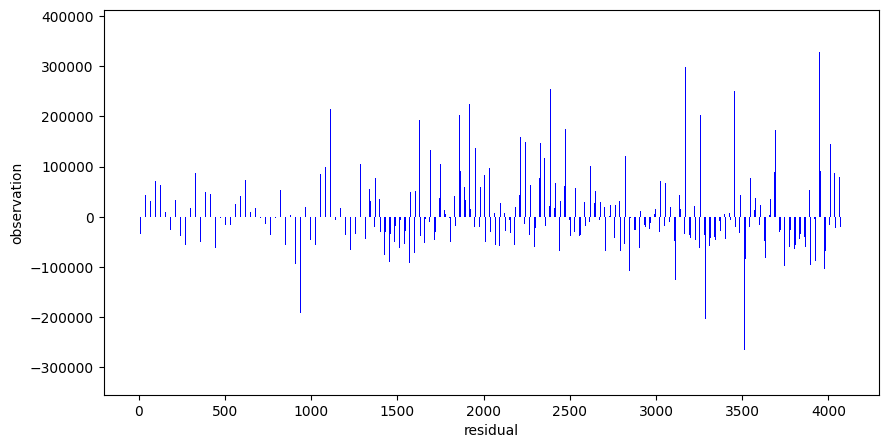

In [27]:
fig = plt.figure(figsize=(10, 5))
plt.bar(performance.index, performance['error'], color='blue', width=0.3)
plt.xlabel('residual')
plt.ylabel('observation')
plt.show()

<BarContainer object of 50 artists>

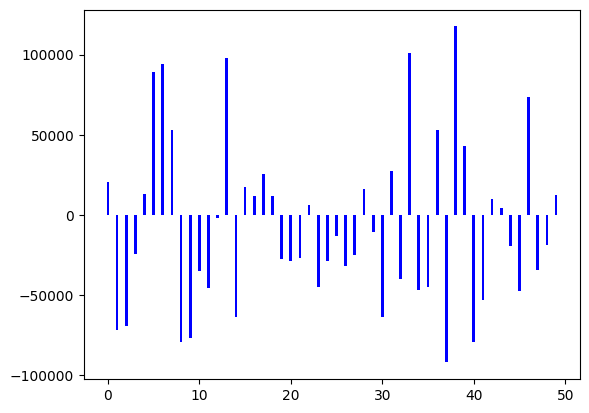

In [28]:
plt.bar('index','error',data=performance[:50], color='blue', width=0.3)

In [29]:
#necessary if you want to run an osl mode using statsmodels.api library with an intercept
x_train=sm.add_constant(x_train)
x_train.head()

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
6885,1.0,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,True,False,False,False,4.441860,0.252182,4.507752
4220,1.0,-118.28,34.12,50.0,2384.0,312.0,836.0,337.0,12.8763,True,False,False,False,7.074184,0.130872,2.480712
9915,1.0,-122.31,38.33,21.0,1922.0,344.0,1051.0,342.0,3.6042,False,False,True,False,5.619883,0.178980,3.073099
294,1.0,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,False,False,True,False,5.006211,0.212159,2.832298
6574,1.0,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,True,False,False,False,5.895765,0.189503,3.218241


In [30]:
# Calculating and printing performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the metrics
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.66
Mean Absolute Error (MAE): 48985.75
Mean Squared Error (MSE): 4643613759.80
Root Mean Squared Error (RMSE): 68144.07


In [31]:
# Assuming x_train and y_train are your data arrays
# Add a constant term for the intercept
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
x_train_with_constant = sm.add_constant(x_train)

In [32]:
x_train_with_constant

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
6885,1.0,-118.09,34.06,31.0,1146.0,289.0,1163.0,258.0,2.2083,True,False,False,False,4.441860,0.252182,4.507752
4220,1.0,-118.28,34.12,50.0,2384.0,312.0,836.0,337.0,12.8763,True,False,False,False,7.074184,0.130872,2.480712
9915,1.0,-122.31,38.33,21.0,1922.0,344.0,1051.0,342.0,3.6042,False,False,True,False,5.619883,0.178980,3.073099
294,1.0,-122.17,37.77,39.0,1612.0,342.0,912.0,322.0,3.3958,False,False,True,False,5.006211,0.212159,2.832298
6574,1.0,-118.16,34.20,43.0,1810.0,343.0,988.0,307.0,3.8203,True,False,False,False,5.895765,0.189503,3.218241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,1.0,-118.51,34.21,36.0,2396.0,421.0,1064.0,398.0,4.7000,True,False,False,False,6.020101,0.175710,2.673367
5249,1.0,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,True,False,False,False,10.344828,0.117333,2.648276
10110,1.0,-117.95,33.92,13.0,2312.0,592.0,2038.0,559.0,3.1378,True,False,False,False,4.135957,0.256055,3.645796
1790,1.0,-122.37,37.94,40.0,1064.0,266.0,912.0,239.0,1.0521,False,False,True,False,4.451883,0.250000,3.815900


In [33]:
# Assuming forest_reg is your RandomForestRegressor instance
# and x_train, y_train are your training data features and labels

# Fit the model
forest_reg.fit(x_train, y_train)

# Reindex x_test to match the columns of x_train (if needed)
x_test = x_test.reindex(columns=x_train.columns)

# Make predictions
y_pred_forest = forest_reg.predict(x_test)

# Calculate performance metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

forest_r2 = r2_score(y_test, y_pred_forest)
forest_mae = mean_absolute_error(y_test, y_pred_forest)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)


In [34]:
# Initialize and fit the model
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [35]:

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train, y_train)

# Predict on the test set
y_pred_forest = forest_reg.predict(x_test)

# Evaluate the model
forest_r2 = r2_score(y_test, y_pred_forest)
forest_mae = mean_absolute_error(y_test, y_pred_forest)
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)

# Print the performance metrics
print(f"Random Forest R-squared: {forest_r2:.2f}")
print(f"Random Forest Mean Absolute Error (MAE): {forest_mae:.2f}")
print(f"Random Forest Mean Squared Error (MSE): {forest_mse:.2f}")
print(f"Random Forest Root Mean Squared Error (RMSE): {forest_rmse:.2f}")


Random Forest R-squared: 0.81
Random Forest Mean Absolute Error (MAE): 32884.51
Random Forest Mean Squared Error (MSE): 2573558315.47
Random Forest Root Mean Squared Error (RMSE): 50730.25


In [36]:
some_data = x_train[:10]
some_labels = y_train.iloc[:10]
my_pred = forest_reg.predict(some_data).tolist()

for i in range(10):
    print(f'real price: {some_labels.tolist() [i]:8.2f}\t\tpredicted price: {my_pred[i]:8.2f}')

real price: 227600.00		predicted price: 234219.00
real price: 110400.00		predicted price: 102727.00
real price: 248100.00		predicted price: 267393.00
real price: 305600.00		predicted price: 278995.02
real price: 214600.00		predicted price: 202448.00
real price: 227300.00		predicted price: 219822.00
real price: 177200.00		predicted price: 191618.05
real price: 84700.00		predicted price: 78218.00
real price: 451400.00		predicted price: 437023.10
real price: 500001.00		predicted price: 452115.66


In [37]:
from joblib import dump, load

dump(forest_reg, 'forest01.pkl')

['forest01.pkl']

In [38]:
import joblib
joblib.dump(x_train.columns, 'model_columns.pkl')

['model_columns.pkl']

In [41]:
# Prediction function
def predict_house_price():
    try:
        # Collect user input
        longitude = float(input("Enter longitude: "))
        latitude = float(input("Enter latitude: "))
        housing_median_age = float(input("Enter housing median age: "))
        total_rooms = float(input("Enter total rooms: "))
        total_bedrooms = float(input("Enter total bedrooms: "))
        population = float(input("Enter population: "))
        households = float(input("Enter households: "))
        median_income = float(input("Enter median income: "))
        ocean_proximity_near_bay = int(input("Near Bay (1 for Yes, 0 for No): "))
        ocean_proximity_1H_OCEAN = int(input("<1H Ocean (1 for Yes, 0 for No): "))
        ocean_proximity_INLAND = int(input("Inland (1 for Yes, 0 for No): "))
        ocean_proximity_NEAR_OCEAN = int(input("Near Ocean (1 for Yes, 0 for No): "))
        
        # Create a DataFrame with the user input
        user_input = pd.DataFrame({
            'longitude': [longitude],
            'latitude': [latitude],
            'housing_median_age': [housing_median_age],
            'total_rooms': [total_rooms],
            'total_bedrooms': [total_bedrooms],
            'population': [population],
            'households': [households],
            'median_income': [median_income],
            'NEAR BAY': [ocean_proximity_near_bay],
            '<1H OCEAN': [ocean_proximity_1H_OCEAN],
            'INLAND': [ocean_proximity_INLAND],
            'NEAR OCEAN': [ocean_proximity_NEAR_OCEAN]
        })
        
        # Ensure the order of columns in user_input matches the training data
        user_input = user_input[x_train.columns]

        # Make prediction
        predicted_price = forest_reg.predict(user_input)

        # Print the predicted price
        print(f"The predicted house price is: ${predicted_price[0]:,.2f}")

    except ValueError as ve:
        print(f"Invalid input: {ve}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Run the prediction function
predict_house_price()

An error occurred: "['rooms_per_household', 'bedrooms_per_room', 'population_per_household'] not in index"
